<div style="max-width:66ch;">

# Overfit and regularization exercises 

These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task


</div>

<div style="max-width:66ch;">

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

</div>


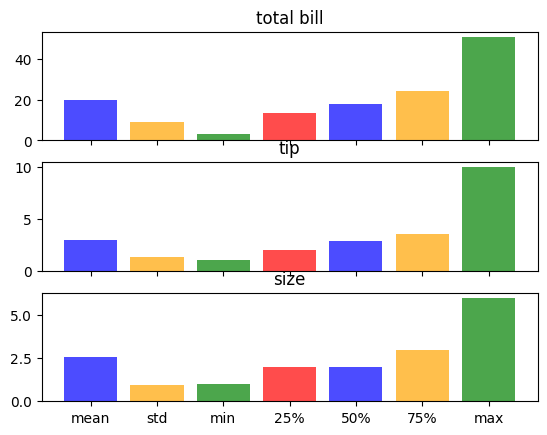

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


df=sns.load_dataset("tips")

# Initial EDA 
#df.info(), df.describe()

df[['total_bill','tip','size']].describe()
fig, axes = plt.subplots(nrows=3, ncols=1, squeeze=True)
axes[0].bar(list(df[['total_bill','tip','size']].describe().drop(['count']).index), df['total_bill'].describe().drop(['count']), color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[1].bar(list(df[['total_bill','tip','size']].describe().drop(['count']).index), df['tip'].describe().drop(['count']), color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[2].bar(list(df[['total_bill','tip','size']].describe().drop(['count']).index), df['size'].describe().drop(['count']), color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[0].set_title('total bill')
axes[0].set_xticklabels([])
axes[1].set_title('tip')
axes[1].set_xticklabels([])
axes[2].set_title('size')

plt.show()



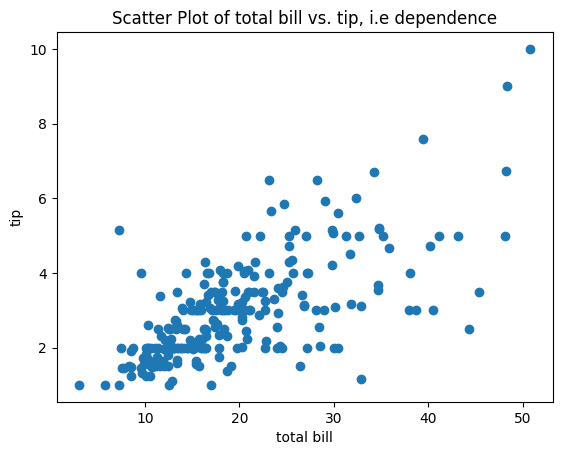

In [122]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Scatter Plot of total bill vs. tip, i.e dependence')
plt.show()

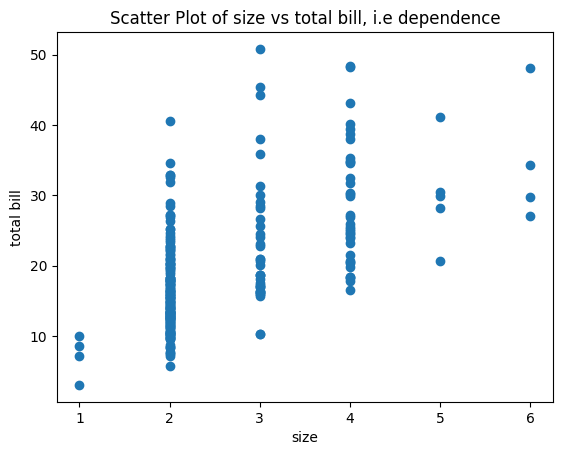

In [123]:
plt.scatter(df['size'], df['total_bill'])
plt.ylabel('total bill')
plt.xlabel('size')
plt.title('Scatter Plot of size vs total bill, i.e dependence')
plt.show()

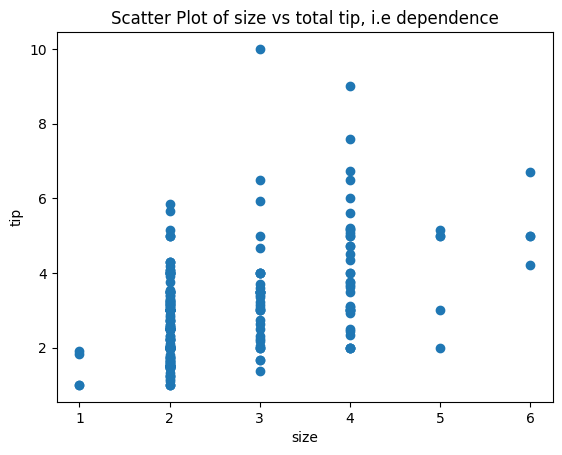

In [124]:
plt.scatter(df['size'], df['tip'])
plt.ylabel('tip')
plt.xlabel('size')
plt.title('Scatter Plot of size vs total tip, i.e dependence')
plt.show()

<div style="max-width:66ch;">

---

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

</div>


In [125]:
from sklearn.model_selection import train_test_split

X1,X2,y = df[['total_bill']], df[['size']], df[['tip']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y, test_size=0.3, random_state=42
)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.3, random_state=42
)

X, y = df[['total_bill','size']], df[['tip']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


X.shape, y.shape


((244, 2), (244, 1))

In [126]:
X_train.shape

(170, 2)

<div style="max-width:66ch;">

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

</div>


In [127]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaler.fit(X_train1)
scaled_X_train= scaler.transform(X_train1)
scaled_X_test = scaler.transform(X_test1)
#mean(X_train)
#scaled_X_train.describe(), scaled_X_test.describe()

# np.mean(X_train1), np.mean(X_train2)

scal_X_train=(X_train -np.mean(X_train))/np.std(X_train)
scal_X_test=(X_test -np.mean(X_train))/np.std(X_train)

# scal_X2_train=(X_train2 -np.mean(X_train2))/np.std(X_train2)
# scal_X2_test=(X_test2 -np.mean(X_train2))/np.std(X_train2)

print(f"x1 train mean = {np.mean(scal_X_train)}, x1 train std {np.std(scal_X_train)}")
print(f"x1 test mean = {np.mean(scal_X_test)}, x1 test std {np.std(scal_X_test)}")


x1 train mean = -4.271913024879751, x1 train std total_bill    1.0
size          1.0
dtype: float64
x1 test mean = -4.390341525937847, x1 test std total_bill    0.921400
size          1.062288
dtype: float64


c:\Source\AI-stuff\venv\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<div style="max-width:66ch;">

---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 

</div>



In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model_2 = PolynomialFeatures(2, include_bias=False)

X_features = poly_model_2.fit_transform(scal_X_train)
X_features

#x_poly_features = poly_model_2.transform(scal_X1_train.reshape(-1,1))

# model = LinearRegression()
# model.fit(X_features, y)

# y_pred = model.predict(x_poly_features)


# poly2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_features = poly2.fit_transform(np.aray(scal_X1_train).reshape(-1,1))
poly2_reg_mod =LinearRegression()
poly2_reg_mod.fit(X_features, y_train1)
# ()


LinearRegression()

In [129]:
model_poly=PolynomialFeatures(3, include_bias=False)
    # transformera feature space
train_features= model_poly.fit_transform(X_train)

X_test.shape

(74, 2)

<div style="max-width:66ch;">


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

</div>


In [130]:
from sklearn.metrics import mean_squared_error
RMSD=[]

for degree in range(1,5):
    model_poly=PolynomialFeatures(degree, include_bias=False)
    # transformera feature space
    
    test_features=model_poly.fit_transform(X_test)train_features= model_poly.fit_transform(X_train)
    #val_features= model_poly.fit_transform(X_val)

    model_linear_regression = LinearRegression()
    model_linear_regression.fit(train_features,y_train)
    # predict on valöidation data
    y_pred=model_linear_regression.predict(test_features)
    y_pred_train=model_linear_regression.predict(train_features)
    RMSD.append([np.sqrt(mean_squared_error(y_test,y_pred)), np.sqrt(mean_squared_error(y_train,y_pred_train))])

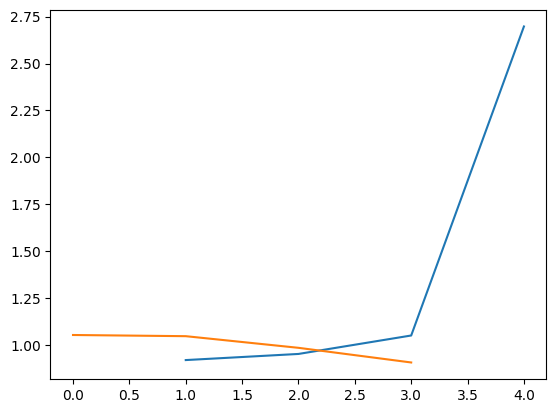

In [146]:

z=[int(s) for s in range(1,5)]

#plt.scatter(z, RMSD[:,0])
D=np.array(RMSD)

D[:,1]

plt.plot(z, D[:,0], D[:,1]) 

<div style="max-width:66ch;">

---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

</div>

In [158]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error

scaler=StandardScaler()

scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_poly=PolynomialFeatures(4, include_bias=False)
train_features= model_poly.fit_transform(scaled_X_train)
test_features = model_poly.fit_transform(scaled_X_test)
# train_features= model_poly.fit_transform(X_train)
# CV - cross validation, with different alphas, and scoring neg RMSD
model_ridge_CV = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], scoring="neg_mean_squared_error")


model_ridge_CV.fit(train_features, y_train)
model_ridge_CV.alpha_, model_ridge_CV.coef_

y_pred = model_ridge_CV.predict(test_features)

RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MAE = mean_absolute_error(y_pred, y_test)

MAE, RMSE

(0.8314771334251267, 1.4898123300913177)

In [164]:
from sklearn.linear_model import LassoCV

model_lasso_CV= LassoCV(eps=0.001, n_alphas=100, max_iter=int(1e4), cv=5)
model_lasso_CV.fit(train_features,y_train)
model_lasso_CV.alpha_

y_pred = model_lasso_CV.predict(test_features)

RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MAE = mean_absolute_error(y_pred, y_test)

MAE, RMSE


c:\Source\AI-stuff\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.8243753626850194, 1.1612566371186621)

<div style="width: 66ch;">


</div>

In [166]:
from sklearn.linear_model import ElasticNetCV
model_elastic =ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], eps=0.001, n_alphas=100, max_iter=int(1e4))

model_elastic=model_elastic.fit(train_features, y_train)
model_elastic.alpha_

c:\Source\AI-stuff\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.10839018107107092

In [169]:
model_elastic.l1_ratio_, model_elastic.coef_

(0.9,
 array([ 0.51628455,  0.09794359, -0.2112758 ,  0.        ,  0.        ,
         0.        ,  0.11342458,  0.        ,  0.01797787,  0.03695473,
         0.        ,  0.        ,  0.        ,  0.        ]))

In [168]:
y_pred = model_elastic.predict(test_features)

RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
MAE = mean_absolute_error(y_pred, y_test)

MAE, RMSE

(0.7611548010990521, 1.1402337734894132)

<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>